# **Regresión Lineal**
## Universidad Nacional de Colombia
### Diplomado en IA y AP
### Juan Pablo Mojica Macías
---

## **Introducción**

En algunas ocasiones te has dado cuenta que un pequeño cambio en la variables de nuestra cotidianidad influyen en el resultado final de nuestro objetivo. Por ejemplo, cuando tu colocas el despertador, pero por alguna razón este no suena a la hora indicada, todo tu día sufre algún tipo de cambio. Puedes llegar tarde al trabajo, puedes perder tu medio de transporte, el tiempo de tu desayuno es menor, etc. Esto se debe por que algunas de tus actividades dependen de ciertas acciones y cualquier cambio de estás influyen en el resultado final. Este tipo de dependencias se conocen como modelos regresivos o modelo predictivos

Aunque el objetivo de este escrito no está centrado en un experimento tan ambiguo como el mencionado anteriormente, se trabajará en un modelo de regresión o análisis de regresión, que es una de las técnicas estadísticas más utilizadas para analizar datos ya que este permite visualizar la relación entre variables y nos enfocaremos principalmente en una modelo de regresión lineal.

![Imagen1](https://imagecache.jpl.nasa.gov/images/edu/activities/temp_graphing_main-640x350.jpg)

## **Historia**

De acuerdo a diferentes investigaciones, se logra plantear que la primera forma de regresión lineal documentada fue el método de los mínimos cuadrados que fue publicada por Legendre en **1805**, Gauss publicó un trabajo en donde desarrollaba de manera más profunda el método de los mínimos cuadrados, y en dónde se incluía una versión del teorema de Gauss-Márkov.

El término regresión se utilizó por primera vez al comparar la estatura de padres e hijos, donde resultó que los hijos cuyos padres tenían una estatura muy superior al valor medio, tendían a igualarse a este, mientras que aquellos cuyos padres eran muy bajos tendían a reducir su diferencia respecto a la estatura media; es decir, "regresaban" al promedio. 

El término lineal se emplea para distinguirlo del resto de técnicas de regresión, que emplean modelos basados en cualquier clase de función matemática. Los modelos lineales son mucho más ágiles y con un soporte teórico mucho más extenso por parte de la matemática y la estadística. [Tomado de Wikipedia](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal)

## **Modelo de Regresión Lineal**

Se conoce como un modelo de **regresión lineal**, a la relación entre de una variable $Y$ conocida como una variable dependiente (o variable respuesta) y $n$ variables  $X_1,X_2,\cdots,X_n$ conocidas como independientes (o regresora), representados de la siguiente manera

$$\begin{equation}Y=\beta_0+\beta_1X_1+\beta_2X_2+\cdots+\beta_nX_n+\epsilon\end{equation}$$

donde $\beta_i$, $i=0,1,2,\cdots,n$ son los parámetros del modelo, generalmente desconcocidos y $\epsilon$ el error estadístico del modelo, es decir, que es una variable aleatoria que explica por que le modelo no ajusta exactamente los datos.

Para tener una mejor comprensión de un modelo de regresión lineal, empezaremos hablando de un modelo de regresión lineal simple.

### **Modelo de Regresión Lineal Simple**

Se le llama modelo de regresión lineal simple, a un modelo con una sola variable regresora $x$, de tal forma que la forma que la variable dependiente $Y$ queda expresada a través de la ecuación 

$$\begin{equation}Y=\beta_0+\beta_1x+\epsilon\end{equation}$$ 

que tiene estructura de linea recta. 
Cabe resaltar que $\beta_0$ y $\beta_1$ son los parámetros desconocidos de la intersección y la pendiente, respectivamente, y $\epsilon$ es una variable aleatoria que se supone que esta distribuida con $E[\epsilon]=0$ y $V[\epsilon]=\sigma^2$. 

### **Modelo de Regresión Lineal Simple Ajustado** 

Es correcto indicar que como los valores de $ \beta_0$ y $\beta_1$ son desconocidos, entonces uno de los aspectos más importantes del análisis de regresión se centra en la estimación de estos parámetros (o **Coeficientes de regresión**), denotados como $\hat{\beta_0}$ y $\hat{\beta_1}$. Por lo tanto, también estamos generando la **recta ajusta** o **estimada**. 

$$\hat{y}=\hat{\beta_0}+\hat{\beta_1}x$$

donde $\hat{y}$ es el valor pronosticado o ajustado.

Adicionalmente, la representación gráfica de los datos observados se conoce como **diagrama de de dispersión** y en algunas ocasiones en este gráfico también se representa la recta ajustada.

<figure>
<center><img src="GraficoDispersion.png" width="500px" alt="Relación Lineal"></center>
</figure>

Existen diferente métodos para estimar lo parámetros del modelo, pero el más usado y conocido en la teoría es el **Método de Mínimos Cuadrados (MCM)**. Donde se obtiene que

$$\hat{\beta_1}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}\qquad\text{y}\qquad\hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x}$$

Una de las propiedades más importantes de estos estimadores es que son **insesgados**.

## **Ejemplo: Aplicación a Datos reales**
A continuación, se presentará la implementación de un modelo de regresión lineal a un conjunto de datos reales. Estos datos fueron tomados de los registros de **datos abiertos de Colombia** [www.datos.gov.co](https://www.datos.gov.co).

### **Descripción de Datos y Aplicación con Python3**
El siguiente conjunto de datos tiene la información de los nacimientos reportados por el hospital Manuel Uribe Ángel, con una cohorte de enero 2018 hasta septiembre 2019, al municipio de envigado. Está base de datos está compuesta por **9965** registros y **33** variables. Para mayor información de las variables se puede ver la base de datos [Ver Base de Datos](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Nacidos-Vivos-en-Hospital-Manuel-Uribe-Angel/udqu-ifxr).

***NOTA:*** *Las variables seleccionadas se hicieron a conveniencia para ver la aplicación de los modelo de regresión*. 

In [1]:
#Importamos Librerias
import sklearn as skl
import numpy as np
import scipy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importamos la base de datos
peso=pd.read_csv("/home/juanpablo/Descargas/Peso_Nacidos.csv",header=0,sep=",")
print('Dimesión Datos:',peso.shape)
peso.head()

Dimesión Datos: (9965, 7)


,PESO (Gramos),TALLA (Centímetros),TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,EDAD MADRE,EDAD PADRE,NUMERO DE EMBARAZOS
0,2610,47,34,2,19,20,2
1,2200,45,37,10,20,30,2
2,2730,48,38,9,29,26,1
3,3730,52,40,9,23,25,2
4,2650,47,37,9,32,48,2


La base de datos a trabajar, está compuesta por **9965** registros y **7** variables
* **PESO (Gramos):** Peso del nacido en gramos.
* **TALLA (Centímetros):** Estatura del nacido en centímetros.
* **TIEMPO DE GESTACIÓN:** Tiempo de gestación en semanas.
* **NÚMERO DE CONSULTAS PRENATALES**
* **EDAD MADRE EN AÑOS**
* **EDAD PADRES EN AÑOS**
* **NÚMERO DE EMBARAZOS**

Se asumirá como variable dependiete $Y$ al **PESO (Gramos)**.

In [3]:
peso.describe()

,PESO (Gramos),TALLA (Centímetros),TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,EDAD MADRE,EDAD PADRE,NUMERO DE EMBARAZOS
count,9965.000000,9965.000000,9965.000000,9965.000000,9965.000000,9965.00000,9965.000000
mean,3077.561164,48.565780,38.343001,7.613648,26.175013,29.31711,1.776819
std,494.497770,2.652724,1.866146,2.631842,6.089843,8.30492,1.032182
min,540.000000,28.000000,23.000000,0.000000,13.000000,-4.00000,1.000000
25%,2820.000000,47.000000,38.000000,6.000000,21.000000,24.00000,1.000000
50%,3110.000000,49.000000,39.000000,8.000000,25.000000,28.00000,1.000000
75%,3380.000000,50.000000,40.000000,9.000000,30.000000,34.00000,2.000000
max,5090.000000,58.000000,42.000000,25.000000,46.000000,70.00000,11.000000


In [4]:
rows_without_missing_data = peso.dropna()
rows_without_missing_data.shape
peso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   PESO (Gramos)                9965 non-null   int64
 1   TALLA (Centímetros)          9965 non-null   int64
 2   TIEMPO DE GESTACIÓN          9965 non-null   int64
 3   NÚMERO CONSULTAS PRENATALES  9965 non-null   int64
 4   EDAD MADRE                   9965 non-null   int64
 5   EDAD PADRE                   9965 non-null   int64
 6   NUMERO DE EMBARAZOS          9965 non-null   int64
dtypes: int64(7)
memory usage: 545.1 KB


El siguiente gráfico muestra la relación que existen entre las variables:

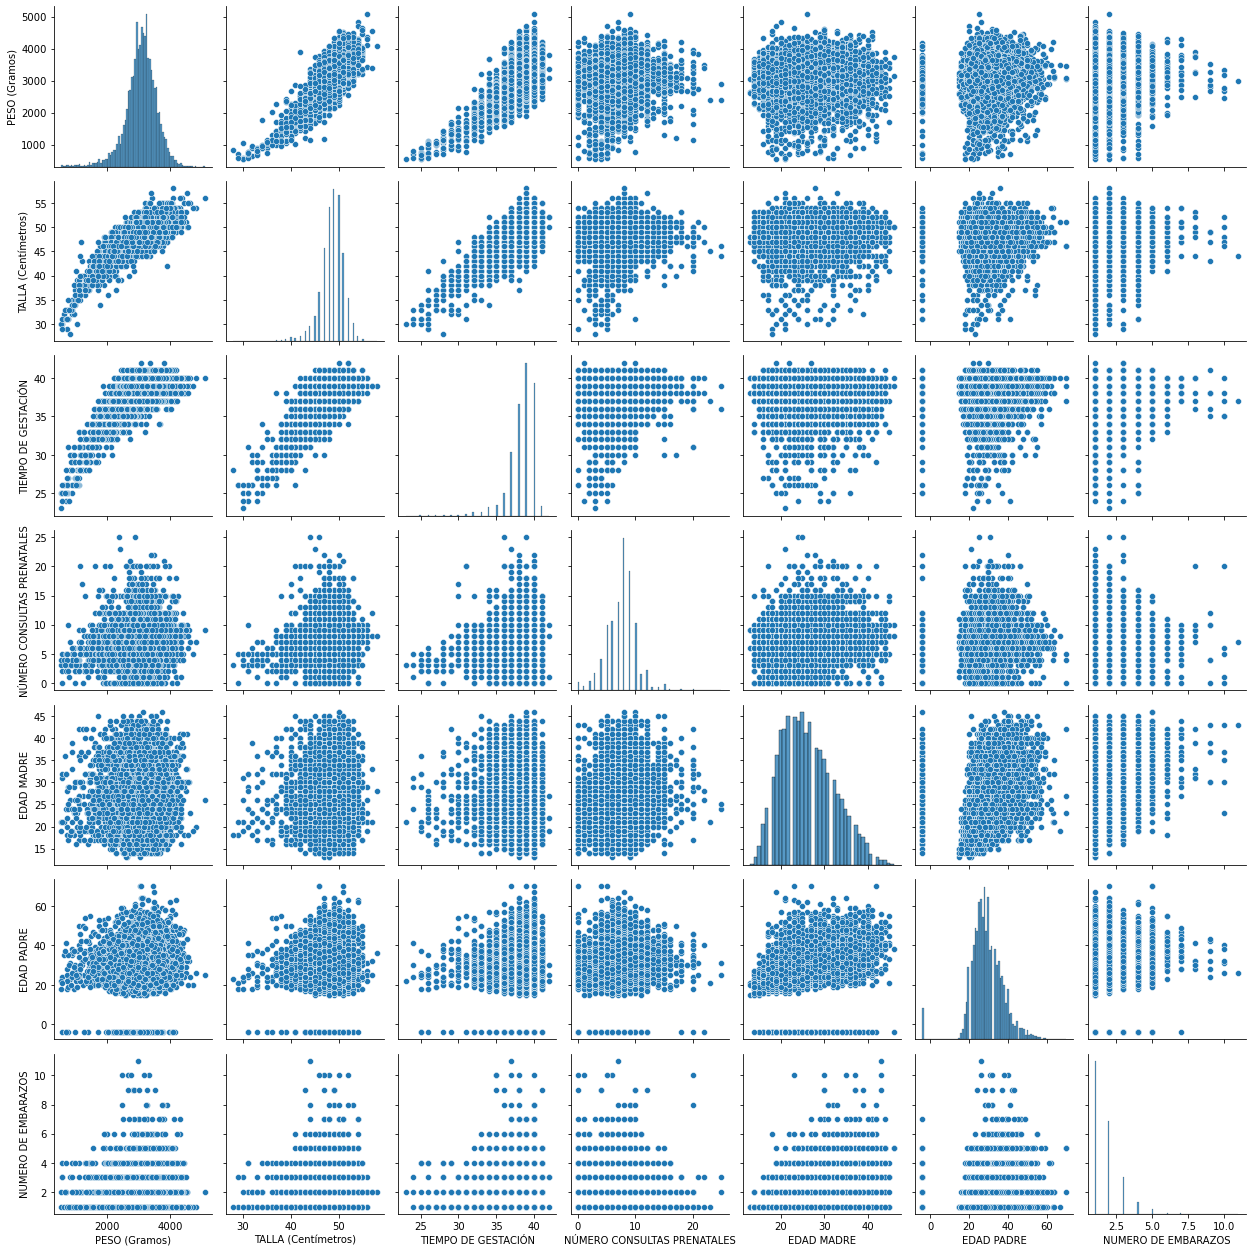

In [5]:
sns.pairplot(peso, height=2.5)
plt.tight_layout()
plt.show()

Como se puede ver, aparentemente se puede ver una relación lineal entre las variables **PESO-TALLA** y **PESO-TIEMPO DE GESTACIÓN**.

A continuación se determina el gráfico de correlaciones para establecer el modelo de regresión lineal simple a ajustar.

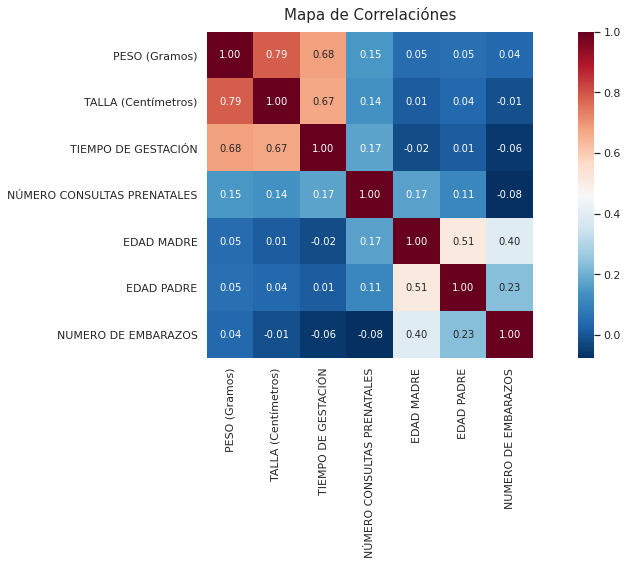

In [6]:
#cols=['PESO','TALLA','TIEMPO DE GESTACIÓN','No CONSULTAS','EDAD MADRE','EDAD PADRE','No EMBARAZOS']
#cor=np.corrcoef(peso.values.T)
cor=peso.corr()
sns.set(font_scale=1.0)
plt.figure(figsize=(16,6))
hm=sns.heatmap(cor,cmap='RdBu_r',cbar=True,annot=True,square=True,fmt='.2f',
               annot_kws={'size':10})
hm.set_title('Mapa de Correlaciónes',fontdict={'fontsize':15},pad=12);

De acuerdo al grŕafico, se puede evidenciar que la correlación más alta se encuetra entre las variables **PESO** y **TALLA** con un valor de $0.79$. Dada esta correlación y el comportamiento de los datos, se precederá a ajustar el siguiente modelo:

$$PESO=\beta_0+\beta_1\cdot TALLA+\epsilon$$

## Regresión Lineal Simple
A continuación se presenta el gráfico de dispersión de los datos de entrenamiento y prueba

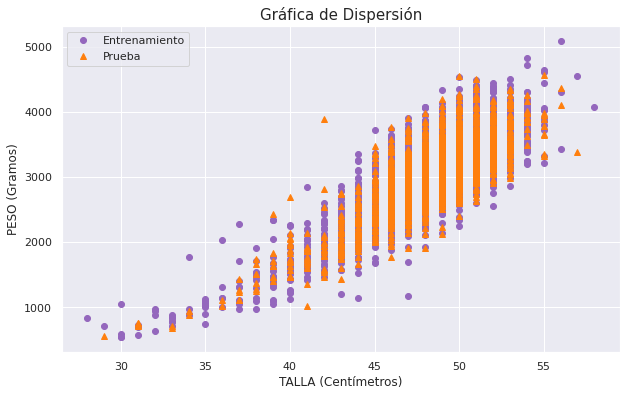

In [7]:
#regresión Lineal Simple
from sklearn.model_selection import train_test_split
y=peso['PESO (Gramos)']
x=peso['TALLA (Centímetros)']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
plt.figure(figsize=(10,6))
plt.plot(x_train,y_train,'o',color='tab:purple',label='Entrenamiento',alpha=1)
plt.plot(x_test,y_test,'^',color='tab:orange',label='Prueba',alpha=1)
plt.title('Gráfica de Dispersión',fontdict={'fontsize':15})
plt.ylabel('PESO (Gramos)')
plt.xlabel('TALLA (Centímetros)')
plt.legend(loc='upper left')
plt.show()

In [8]:
#Ajustar elmodelo de regresión lineal
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

X_train=np.array(x_train)
Y_train=np.array(y_train)

modelo=linear_model.LinearRegression()
modelo.fit(X_train.reshape(-1,1),Y_train)

Y_pred_train=modelo.predict(X_train.reshape(-1,1))

#Evalucuón del rendimiento de los modelos
X_test=np.array(x_test).reshape(-1,1)
Y_test=np.array(y_test)
Y_pred_test=modelo.predict(X_test)

print('Coeficientes: \n','Intercepto= %.3f' %modelo.intercept_,'\n','Pendiente=%.3f' %modelo.coef_[0])
print('ECM: %.3f' %mean_squared_error(Y_train,Y_pred_train))
print('R²: %.3f' %r2_score(Y_train,Y_pred_train))

Coeficientes: 
 Intercepto= -4075.616 
 Pendiente=147.274
ECM: 93797.506
R²: 0.618


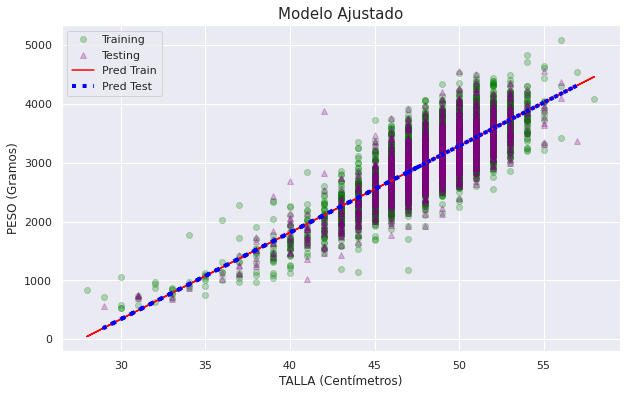

In [9]:
#Representación del Modelo Ajustado
plt.figure(figsize=(10,6))
plt.plot(X_train,Y_train,'o',color='green',alpha=0.25,label='Training')
plt.plot(X_test,Y_test,'^',color='purple',alpha=0.25,label='Testing')
plt.plot(X_train,Y_pred_train,color='red',label='Pred Train')
plt.plot(X_test,Y_pred_test,linestyle=':',linewidth=4,color='blue',label='Pred Test')
plt.title('Modelo Ajustado',fontdict={'fontsize':15})
plt.ylabel('PESO (Gramos)')
plt.xlabel('TALLA (Centímetros)')
plt.legend(loc='upper left')
plt.show()

Como lo vimos anteriormente, se realizo el proceso de estimación de un modelo de regresión lineal simple. Sin embargo, se pretende indicar una medida del rendimiento a través del  **MSE** (Error Cuadrático Medio). Entonces, si el MSE del entrenamiento es mucho menor que el MSE de prueba, entonces decimos que el modelo tiene sobreajuste.  

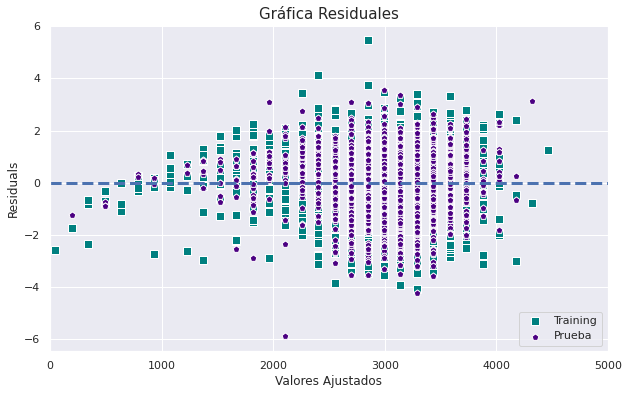

In [10]:
#Rendimiento del Modelo 
res_train=Y_pred_train-Y_train
res_train_stand=(res_train-res_train.mean())/res_train.std()
res_test=Y_pred_test-Y_test
res_test_stand=(res_test-res_test.mean())/res_test.std()

plt.figure(figsize=(10,6))
plt.scatter(Y_pred_train,res_train_stand,marker='s',c='teal',edgecolor='white',s=50.,label='Training')
plt.scatter(Y_pred_test,res_test_stand,marker='p',c='indigo',edgecolor='white',s=50.,label='Prueba')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuals')
plt.legend(loc='lower right')
plt.hlines(y=0,xmin=-0.1,xmax=5000,lw=3,ls='--')
plt.xlim([-0.1,5000])
plt.title('Gráfica Residuales',fontdict={'fontsize':15})
plt.show()

In [11]:
print('MSE Training: %.3f, MSE Test %.3f' %(mean_squared_error(Y_train,Y_pred_train),
                                           mean_squared_error(Y_test,Y_pred_test)))
print('R² Training: %.3f, R² Test %.3f' %(r2_score(Y_train,Y_pred_train),
                                           r2_score(Y_test,Y_pred_test)))

MSE Training: 93797.506, MSE Test 91214.198
R² Training: 0.618, R² Test 0.622


De acuerdo a los resultados obtenidos para el MSE de entrenamiento y prueba, podemos indicar que los datos de entrenamiento tiene sobreajuste. Adicionalmente, con relación al $R^2$ podemos ver que el de los datos de entrenamiento y de prueba son muy similares, alrededor del 60%

## Regresión Lineal Múltiple

Se denomina un modelo de **regresión múltiple** donde intervienen más de dos variables independientes o regresoras. Para nuestro ejemplo de aplicación, supondremos el siguiente modelo:
* $Y=$ PESO (Gramos).
* $x_1=$ TALLA (Centímetros).
* $x_2=$ TIEMPO DE GESTACIÓN.
* $x_3=$ NÚMERO DE CONSULTAS PRENATALES.
* $x_4=$ EDAD MADRE.
* $x_5=$ EDAD PADRES.
* $x_6=$ NÚMERO DE EMBARAZOS.

$$Y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3\beta_4x_4+\beta_5x_5+\beta_6x_6+\epsilon$$

In [12]:
#regresión Lineal múltiple
from sklearn.model_selection import train_test_split
y_mul=peso['PESO (Gramos)']
x_mul=peso.iloc[:,1:7]

x_m_train,x_m_test,y_m_train,y_m_test=train_test_split(x_mul,y_mul,test_size=0.3)

In [13]:
#Ajustar elmodelo de regresión lineal múltiple
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

X_m_train=np.array(x_m_train)
Y_m_train=np.array(y_m_train)

modelo_mul=linear_model.LinearRegression()
modelo_mul.fit(X_m_train,Y_m_train)

Y_pred_m_train=modelo_mul.predict(X_m_train)

#Evalucuón del rendimiento de los modelos
X_m_test=np.array(x_m_test)
Y_m_test=np.array(y_m_test)
Y_pred_m_test=modelo_mul.predict(X_m_test)

print('Coeficientes:')
print('Intercepto= %.3f' %modelo_mul.intercept_)
print('B1= %.3f'%modelo_mul.coef_[0])
print('B2= %.3f'%modelo_mul.coef_[1])
print('B3= %.3f'%modelo_mul.coef_[2])
print('B4= %.3f'%modelo_mul.coef_[3])
print('B5= %.3f'%modelo_mul.coef_[4])
print('B6= %.3f'%modelo_mul.coef_[5])

print('ECM: %.3f' %mean_squared_error(Y_m_train,Y_pred_m_train))
print('R²: %.3f' %r2_score(Y_m_train,Y_pred_m_train))

Coeficientes:
Intercepto= -5353.631
B1= 113.132
B2= 72.846
B3= 5.061
B4= 2.185
B5= 0.374
B6= 22.493
ECM: 82858.404
R²: 0.659


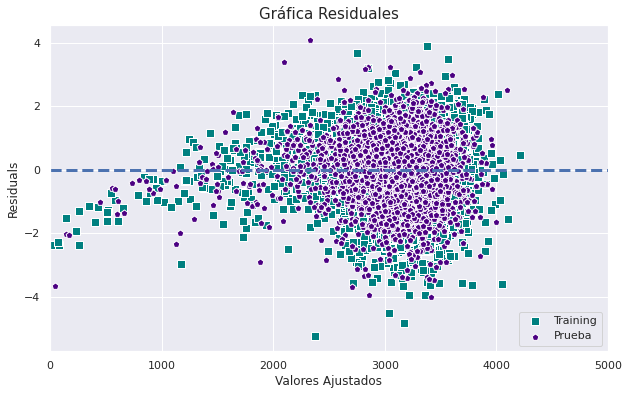

In [14]:
res_train_mul=Y_pred_m_train-Y_m_train
res_train_stand_mul=(res_train_mul-res_train_mul.mean())/res_train_mul.std()
res_test_mul=Y_pred_m_test-Y_m_test
res_test_stand_mul=(res_test_mul-res_test_mul.mean())/res_test_mul.std()

plt.figure(figsize=(10,6))
plt.scatter(Y_pred_m_train,res_train_stand_mul,marker='s',c='teal',edgecolor='white',s=50.,label='Training')
plt.scatter(Y_pred_m_test,res_test_stand_mul,marker='p',c='indigo',edgecolor='white',s=50.,label='Prueba')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuals')
plt.legend(loc='lower right')
plt.hlines(y=0,xmin=-0.1,xmax=5000,lw=3,ls='--')
plt.xlim([-0.1,5000])
plt.title('Gráfica Residuales',fontdict={'fontsize':15})
plt.show()

In [15]:
print('MSE Training: %.3f, MSE Test %.3f' %(mean_squared_error(Y_m_train,Y_pred_m_train),
                                           mean_squared_error(Y_m_test,Y_pred_m_test)))
print('R² Training: %.3f, R² Test %.3f' %(r2_score(Y_m_train,Y_pred_m_train),
                                           r2_score(Y_m_test,Y_pred_m_test)))

MSE Training: 82858.404, MSE Test 78655.296
R² Training: 0.659, R² Test 0.683


Nuevamente, pero para el caso de el modelo de regresión lineal múltiple. El MSE de entrenamiento y prueba, podemos indicar que los datos de entrenamiento tiene sobreajuste. Adicionalmente, con relación al $R^2$ podemos ver que el de los datos de entrenamiento y de prueba son muy similares, alrededor del 65%.

## Referencias
**NOTA:** El marco teórico aquí presentado fue tomado de los textos:

  * Probabilidad y Estadística para Ciencias e Ingeniería, Walpole, R.E. and Myers, R.H. and Myers, S.L. and Ye, K.,Pearson custom library, 2013, Pearson
  * Introducción al Análisis de Regresión Lineal, Montgomery, D.C. and Peck, P.E. and Vining, G.G. 2002, Ed. Continetal.